In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-hack-house-price-prediction/Test.csv
/kaggle/input/machine-hack-house-price-prediction/sample_submission.csv
/kaggle/input/machine-hack-house-price-prediction/Train.csv


In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import KFold
%matplotlib inline

In [3]:
# to see all the comands result in a single kernal 
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# to increase no. of rows and column visibility in outputs
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
train=pd.read_csv("../input/machine-hack-house-price-prediction/Train.csv")
test=pd.read_csv("../input/machine-hack-house-price-prediction/Test.csv")
sub=pd.read_csv('../input/machine-hack-house-price-prediction/sample_submission.csv')
train.shape
test.shape
sub.shape

(29451, 12)

(68720, 11)

(68720, 1)

In [6]:
sub.head()
train.head()
train.tail()
test.head()
test.tail()

,TARGET(PRICE_IN_LACS)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0
29450,Dealer,0,1,2,BHK,896.774194,1,1,"Jagatpura,Jaipur",26.832353,75.841749,27.8


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670
68719,Dealer,0,0,3,BHK,2439.532944,1,1,"Hiranandani Gardens - Powai,Mumbai",19.124896,72.893503


In [7]:
# Missing Values
train.isnull().sum().sum()
test.isnull().sum().sum()

0

0

In [8]:
train.describe()
test.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
count,68720.000000,68720.000000,68720.000000,6.872000e+04,68720.000000,68720.000000,68720.000000,68720.000000
mean,0.176557,0.316531,2.388198,2.762419e+03,0.823443,0.933498,21.288045,76.919388
std,0.381296,0.465126,0.864577,1.640991e+05,0.381296,0.249159,6.179034,10.100950
min,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,-38.391261,-118.354100
25%,0.000000,0.000000,2.000000,9.000310e+02,1.000000,1.000000,18.452663,73.798100
50%,0.000000,0.000000,2.000000,1.174982e+03,1.000000,1.000000,20.933260,77.324966
75%,0.000000,1.000000,3.000000,1.550265e+03,1.000000,1.000000,26.888396,78.000723
max,1.000000,1.000000,31.000000,4.016393e+07,1.000000,1.000000,65.183330,175.278040


In [9]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 co

In [10]:
#there are duplicates between test and train, for those rows we can directly use train target values
#storing the target values of common rows in test and train
temp1=''
for i in test.columns:
    temp1=temp1+train[i].astype(str)
train['ALL']=temp1
temp2=''
for i in test.columns:
    temp2=temp2+test[i].astype(str)
test['ALL']=temp2
encoding=train.groupby('ALL')['TARGET(PRICE_IN_LACS)'].median()
y_from_train=test['ALL'].map(encoding)

In [11]:
#no. of rows which were directly replaced
len(test)-y_from_train.isnull().sum()

2286

In [12]:
train=train.drop('ALL',1)
test=test.drop('ALL',1)

In [13]:
train['POSTED_BY'].value_counts()
test['POSTED_BY'].value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

Dealer     42437
Owner      24920
Builder     1363
Name: POSTED_BY, dtype: int64

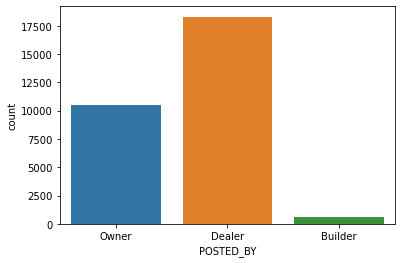

In [14]:
sns.countplot(train['POSTED_BY']);

In [15]:
train['UNDER_CONSTRUCTION'].value_counts()
test['UNDER_CONSTRUCTION'].value_counts()

0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64

0    56587
1    12133
Name: UNDER_CONSTRUCTION, dtype: int64

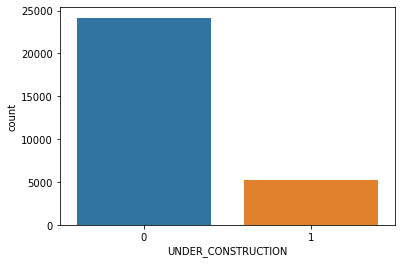

In [16]:
sns.countplot(train['UNDER_CONSTRUCTION']);

In [17]:
train['RERA'].unique()
test['RERA'].unique()

array([0, 1])

array([0, 1])

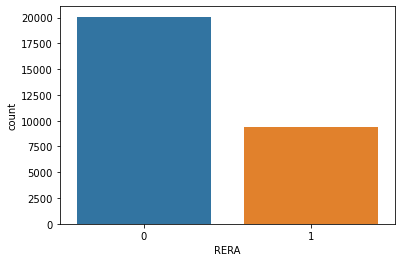

In [18]:
sns.countplot(train['RERA']);

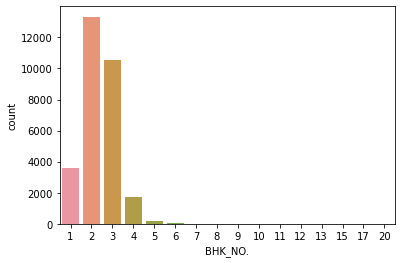

In [19]:
sns.countplot(train['BHK_NO.']);

In [20]:
train['BHK_NO.'].value_counts()
test['BHK_NO.'].value_counts()

2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
15        4
10        4
20        4
12        3
9         3
13        1
11        1
17        1
Name: BHK_NO., dtype: int64

2     30998
3     24756
1      8383
4      4001
5       394
6       106
7        17
8        15
9        13
12       13
10        8
20        6
11        4
13        3
16        1
18        1
31        1
Name: BHK_NO., dtype: int64

In [36]:
train.groupby('BHK_NO.')['TARGET(PRICE_IN_LACS)'].mean()

BHK_NO.
1    3.557568
2    4.008759
3    4.515954
4    5.335098
5    5.798208
6    5.882959
Name: TARGET(PRICE_IN_LACS), dtype: float64

Merging Classes of feature BHK_NO.

In [21]:
train.loc[train['BHK_NO.']>5,'BHK_NO.']=6
test.loc[test['BHK_NO.']>5,'BHK_NO.']=6

In [ ]:
train.groupby('BHK_NO.')['TARGET(PRICE_IN_LACS)'].mean()

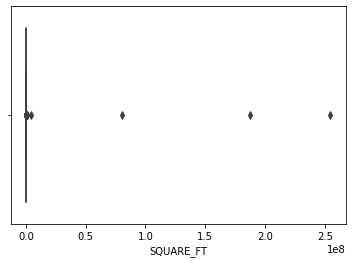

In [22]:
sns.boxplot(train['SQUARE_FT']);

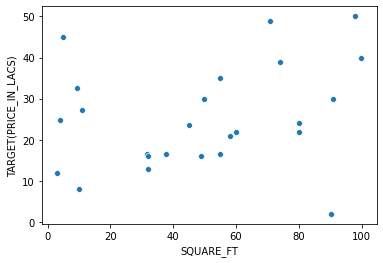

In [23]:
sns.scatterplot(train[train['SQUARE_FT']<100]['SQUARE_FT'],train[train['SQUARE_FT']<100]['TARGET(PRICE_IN_LACS)']);

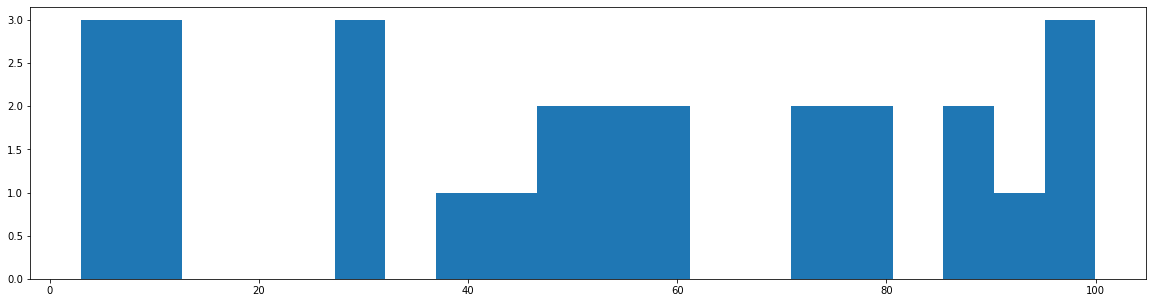

In [24]:
plt.figure(figsize=(20,5))
plt.hist(train[train['SQUARE_FT']<100]['SQUARE_FT'],bins=20);

In [25]:
train.loc[train['SQUARE_FT']<100,'SQUARE_FT']=train.loc[train['SQUARE_FT']<100,'SQUARE_FT']*10
test.loc[test['SQUARE_FT']<100,'SQUARE_FT']=test.loc[test['SQUARE_FT']<100,'SQUARE_FT']*10

In [26]:
train.loc[train['SQUARE_FT']<100,'SQUARE_FT']=train.loc[train['SQUARE_FT']<100,'SQUARE_FT']*10
test.loc[test['SQUARE_FT']<100,'SQUARE_FT']=test.loc[test['SQUARE_FT']<100,'SQUARE_FT']*10

In [27]:
train['SQUARE_FT']=np.log1p(train['SQUARE_FT'])
test['SQUARE_FT']=np.log1p(test['SQUARE_FT'])

In [28]:
train['READY_TO_MOVE'].value_counts()
test['READY_TO_MOVE'].value_counts()

1    24157
0     5294
Name: READY_TO_MOVE, dtype: int64

1    56587
0    12133
Name: READY_TO_MOVE, dtype: int64

In [29]:
train['RESALE'].value_counts()
test['RESALE'].value_counts()

1    27377
0     2074
Name: RESALE, dtype: int64

1    64150
0     4570
Name: RESALE, dtype: int64

In [30]:
#encoding object features
train['POSTED_BY']=train['POSTED_BY'].replace({'Dealer':2,'Owner':1,'Builder':0})
test['POSTED_BY']=test['POSTED_BY'].replace({'Dealer':2,'Owner':1,'Builder':0})
train['BHK_OR_RK']=train['BHK_OR_RK'].replace({'BHK':1,'RK':0})
test['BHK_OR_RK']=test['BHK_OR_RK'].replace({'BHK':1,'RK':0})

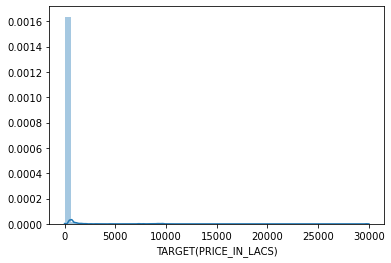

In [31]:
sns.distplot(train['TARGET(PRICE_IN_LACS)']);

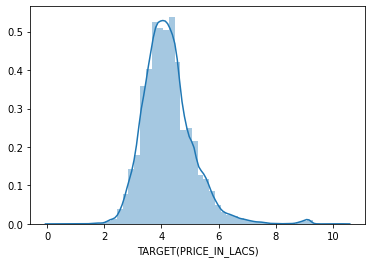

In [32]:
train['TARGET(PRICE_IN_LACS)']=np.log1p(train['TARGET(PRICE_IN_LACS)'])
sns.distplot(train['TARGET(PRICE_IN_LACS)']);

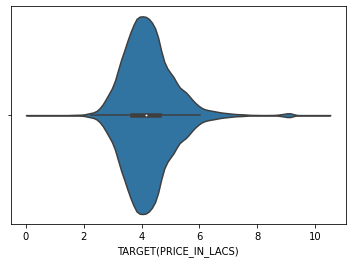

In [33]:
sns.violinplot(train['TARGET(PRICE_IN_LACS)']);

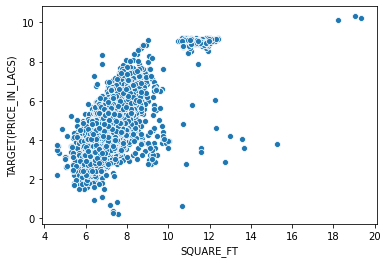

In [34]:
sns.scatterplot(x=train['SQUARE_FT'],y=train['TARGET(PRICE_IN_LACS)']);

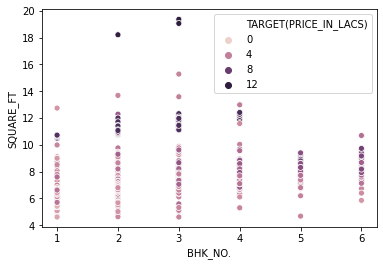

In [35]:
sns.scatterplot(train['BHK_NO.'],train['SQUARE_FT'],hue=train['TARGET(PRICE_IN_LACS)']);

In [37]:
train['SQUARE_FT_PER_ROOM']=train['SQUARE_FT']/train['BHK_NO.']
test['SQUARE_FT_PER_ROOM']=test['SQUARE_FT']/test['BHK_NO.']

In [38]:
train['SQUARE_FT_ROOM']=train['SQUARE_FT']*train['BHK_NO.']
test['SQUARE_FT_ROOM']=test['SQUARE_FT']*test['BHK_NO.']

In [39]:
train['LATITUDE']=train['LONGITUDE']+train['LATITUDE']
train['LONGITUDE']=train['LATITUDE']-train['LONGITUDE']
train['LATITUDE']=train['LATITUDE']-train['LONGITUDE']

test['LATITUDE']=test['LONGITUDE']+test['LATITUDE']
test['LONGITUDE']=test['LATITUDE']-test['LONGITUDE']
test['LATITUDE']=test['LATITUDE']-test['LONGITUDE']

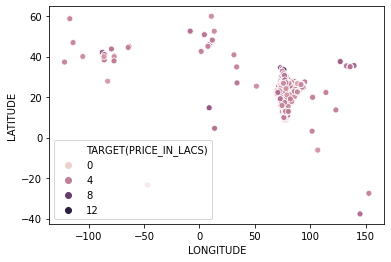

In [40]:
sns.scatterplot(train['LONGITUDE'],train['LATITUDE'],hue=train['TARGET(PRICE_IN_LACS)']);

Extracting locality and city from address

In [45]:
import re
def get_city(text):
    return text.split(',')[-1]
train['CITY']=train['ADDRESS'].apply(get_city)
test['CITY']=test['ADDRESS'].apply(get_city)

In [46]:
def get_locality(text):
    return text.split(',')[-2]
train['LOCALITY']=train['ADDRESS'].apply(get_locality)
test['LOCALITY']=test['ADDRESS'].apply(get_locality)

In [47]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  int64  
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  int64  
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
 12  SQUARE_FT_PER_ROOM     29451 non-null  float64
 13  SQUARE_FT_ROOM         29451 non-null  float64
 14  CITY                   29451 non-null  object 
 15  LO

In [48]:
train['LOCALITY_SF_MEAN']=train['LOCALITY'].map(pd.concat([train,test],axis=0)
                                        .groupby('LOCALITY')['SQUARE_FT'].mean())
test['LOCALITY_SF_MEAN']=test['LOCALITY'].map(pd.concat([train,test],axis=0)
                                         .groupby('LOCALITY')['SQUARE_FT'].mean())

In [49]:
train['LOCALITY_SF_MIN']=train['LOCALITY'].map(pd.concat([train,test],axis=0)
                                        .groupby('LOCALITY')['SQUARE_FT'].min())
test['LOCALITY_SF_MIN']=test['LOCALITY'].map(pd.concat([train,test],axis=0)
                                        .groupby('LOCALITY')['SQUARE_FT'].min())

In [50]:
train['LOCALITY_SF_MAX']=train['LOCALITY'].map(pd.concat([train,test],axis=0)
                                        .groupby('LOCALITY')['SQUARE_FT'].max())
test['LOCALITY_SF_MAX']=test['LOCALITY'].map(pd.concat([train,test],axis=0)
                                        .groupby('LOCALITY')['SQUARE_FT'].max())

In [51]:
train['LOCALITY_SF_STD']=train['LOCALITY'].map(pd.concat([train,test],axis=0)
                                        .groupby('LOCALITY')['SQUARE_FT'].std())
test['LOCALITY_SF_STD']=test['LOCALITY'].map(pd.concat([train,test],axis=0)
                                        .groupby('LOCALITY')['SQUARE_FT'].std())

In [52]:
train['LOCALITY_FT_SF_MEAN']=pd.concat([train,test],axis=0).groupby(['LOCALITY','BHK_OR_RK'])['SQUARE_FT'].transform('mean')[:29451]
test['LOCALITY_FT_SF_MEAN']=pd.concat([train,test],axis=0).groupby(['LOCALITY','BHK_OR_RK'])['SQUARE_FT'].transform('mean')[29451:]

In [53]:
train['LOCALITY_PB_SF_MEAN']=pd.concat([train,test],axis=0).groupby(['LOCALITY','POSTED_BY'])['SQUARE_FT'].transform('mean')[:29451]
test['LOCALITY_PB_SF_MEAN']=pd.concat([train,test],axis=0).groupby(['LOCALITY','POSTED_BY'])['SQUARE_FT'].transform('mean')[29451:]

In [54]:
train['LOCALITY_BHKNO_SF_MEAN']=pd.concat([train,test],axis=0).groupby(['LOCALITY','BHK_NO.'])['SQUARE_FT'].transform('mean')[:29451]
test['LOCALITY_BHKNO_SF_MEAN']=pd.concat([train,test],axis=0).groupby(['LOCALITY','BHK_NO.'])['SQUARE_FT'].transform('mean')[29451:]

In [55]:
from sklearn.model_selection import KFold
fold = KFold(n_splits=4, shuffle=True, random_state=2020)
for train_index, test_index in fold.split(train, train['TARGET(PRICE_IN_LACS)']):
    encoding=train.iloc[train_index].groupby('LOCALITY')['TARGET(PRICE_IN_LACS)'].mean()
    train.loc[test_index,'NLOCALITY']=train.loc[test_index,'LOCALITY'].map(encoding)
encoding=train.groupby('LOCALITY')['TARGET(PRICE_IN_LACS)'].mean()
test['NLOCALITY']=test['LOCALITY'].map(encoding)

In [56]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   POSTED_BY               29451 non-null  int64  
 1   UNDER_CONSTRUCTION      29451 non-null  int64  
 2   RERA                    29451 non-null  int64  
 3   BHK_NO.                 29451 non-null  int64  
 4   BHK_OR_RK               29451 non-null  int64  
 5   SQUARE_FT               29451 non-null  float64
 6   READY_TO_MOVE           29451 non-null  int64  
 7   RESALE                  29451 non-null  int64  
 8   ADDRESS                 29451 non-null  object 
 9   LONGITUDE               29451 non-null  float64
 10  LATITUDE                29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)   29451 non-null  float64
 12  SQUARE_FT_PER_ROOM      29451 non-null  float64
 13  SQUARE_FT_ROOM          29451 non-null  float64
 14  CITY                    29451 non-null

In [57]:
train=train.drop('LOCALITY',axis=1)
test=test.drop('LOCALITY',axis=1)

In [58]:
train['CITY_SF_MEAN']=train['CITY'].map(pd.concat([train,test],axis=0)
                                        .groupby('CITY')['SQUARE_FT'].mean())
test['CITY_SF_MEAN']=test['CITY'].map(pd.concat([train,test],axis=0)
                                         .groupby('CITY')['SQUARE_FT'].mean())

In [59]:
train['CITY_SF_MIN']=train['CITY'].map(pd.concat([train,test],axis=0)
                                        .groupby('CITY')['SQUARE_FT'].min())
test['CITY_SF_MIN']=test['CITY'].map(pd.concat([train,test],axis=0)
                                        .groupby('CITY')['SQUARE_FT'].min())

In [60]:
train['CITY_SF_MAX']=train['CITY'].map(pd.concat([train,test],axis=0)
                                        .groupby('CITY')['SQUARE_FT'].max())
test['CITY_SF_MAX']=test['CITY'].map(pd.concat([train,test],axis=0)
                                        .groupby('CITY')['SQUARE_FT'].max())

In [61]:
train['CITY_SF_STD']=train['CITY'].map(pd.concat([train,test],axis=0)
                                        .groupby('CITY')['SQUARE_FT'].std())
test['CITY_SF_STD']=test['CITY'].map(pd.concat([train,test],axis=0)
                                        .groupby('CITY')['SQUARE_FT'].std())

In [62]:
train['CITY_PB_SF_MEAN']=pd.concat([train,test],axis=0).groupby(['CITY','POSTED_BY'])['SQUARE_FT'].transform('mean')[:29451]
test['CITY_PB_SF_MEAN']=pd.concat([train,test],axis=0).groupby(['CITY','POSTED_BY'])['SQUARE_FT'].transform('mean')[29451:]

In [63]:
train['CITY_FT_SF_MEAN']=pd.concat([train,test],axis=0).groupby(['CITY','BHK_OR_RK'])['SQUARE_FT'].transform('mean')[:29451]
test['CITY_FT_SF_MEAN']=pd.concat([train,test],axis=0).groupby(['CITY','BHK_OR_RK'])['SQUARE_FT'].transform('mean')[29451:]

In [64]:
train['CITY_BHKNO_SF_MEAN']=pd.concat([train,test],axis=0).groupby(['CITY','BHK_NO.'])['SQUARE_FT'].transform('mean')[:29451]
test['CITY_BHKNO_SF_MEAN']=pd.concat([train,test],axis=0).groupby(['CITY','BHK_NO.'])['SQUARE_FT'].transform('mean')[29451:]

In [65]:
fold = KFold(n_splits=5, shuffle=True, random_state=2020)
for train_index, test_index in fold.split(train, train['TARGET(PRICE_IN_LACS)']):
    encoding=train.iloc[train_index].groupby('CITY')['TARGET(PRICE_IN_LACS)'].mean()
    train.loc[test_index,'NCITY']=train.loc[test_index,'CITY'].map(encoding)
encoding=train.groupby('CITY')['TARGET(PRICE_IN_LACS)'].mean()
test['NCITY']=test['CITY'].map(encoding)

In [66]:
train=train.drop('CITY',axis=1)
test=test.drop('CITY',axis=1)

In [67]:
train['X']=np.cos(train['LATITUDE'])*np.cos(train['LONGITUDE'])
train['Y']=np.cos(train['LATITUDE'])*np.sin(train['LONGITUDE'])
train['Z']=np.sin(train['LATITUDE'])
test['X']=np.cos(test['LATITUDE'])*np.cos(test['LONGITUDE'])
test['Y']=np.cos(test['LATITUDE'])*np.sin(test['LONGITUDE'])
test['Z']=np.sin(test['LATITUDE'])

In [68]:
drop_cols=['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE','TARGET(PRICE_IN_LACS)', 'SQUARE_FT_PER_ROOM','SQUARE_FT_ROOM','CITY','X','Y','Z']

In [69]:
train=train.drop(['ADDRESS'],axis=1)
test=test.drop(['ADDRESS'],axis=1)

In [70]:
train=train.drop_duplicates()
train.shape

(29384, 32)

In [71]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29384 entries, 0 to 29450
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   POSTED_BY               29384 non-null  int64  
 1   UNDER_CONSTRUCTION      29384 non-null  int64  
 2   RERA                    29384 non-null  int64  
 3   BHK_NO.                 29384 non-null  int64  
 4   BHK_OR_RK               29384 non-null  int64  
 5   SQUARE_FT               29384 non-null  float64
 6   READY_TO_MOVE           29384 non-null  int64  
 7   RESALE                  29384 non-null  int64  
 8   LONGITUDE               29384 non-null  float64
 9   LATITUDE                29384 non-null  float64
 10  TARGET(PRICE_IN_LACS)   29384 non-null  float64
 11  SQUARE_FT_PER_ROOM      29384 non-null  float64
 12  SQUARE_FT_ROOM          29384 non-null  float64
 13  LOCALITY_SF_MEAN        29384 non-null  float64
 14  LOCALITY_SF_MIN         29384 non-null

In [72]:
train.corr()[abs(train.corr())>0.4]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),SQUARE_FT_PER_ROOM,SQUARE_FT_ROOM,LOCALITY_SF_MEAN,LOCALITY_SF_MIN,LOCALITY_SF_MAX,LOCALITY_SF_STD,LOCALITY_FT_SF_MEAN,LOCALITY_PB_SF_MEAN,LOCALITY_BHKNO_SF_MEAN,NLOCALITY,CITY_SF_MEAN,CITY_SF_MIN,CITY_SF_MAX,CITY_SF_STD,CITY_PB_SF_MEAN,CITY_FT_SF_MEAN,CITY_BHKNO_SF_MEAN,NCITY,X,Y,Z
POSTED_BY,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.401657,NaN,NaN,NaN
UNDER_CONSTRUCTION,NaN,1.0,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RERA,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BHK_NO.,NaN,NaN,NaN,1.000000,NaN,0.668176,NaN,NaN,NaN,NaN,0.502076,-0.875626,0.983932,0.477522,NaN,NaN,NaN,0.478134,0.484628,0.833066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.958313,NaN,NaN,NaN,NaN
BHK_OR_RK,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SQUARE_FT,NaN,NaN,NaN,0.668176,NaN,1.000000,NaN,NaN,NaN,NaN,0.638905,-0.491322,0.772245,0.592725,NaN,NaN,NaN,0.594303,0.632369,0.802524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.696048,NaN,NaN,NaN,NaN
READY_TO_MOVE,NaN,-1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RESALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LONGITUDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LATITUDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.523943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


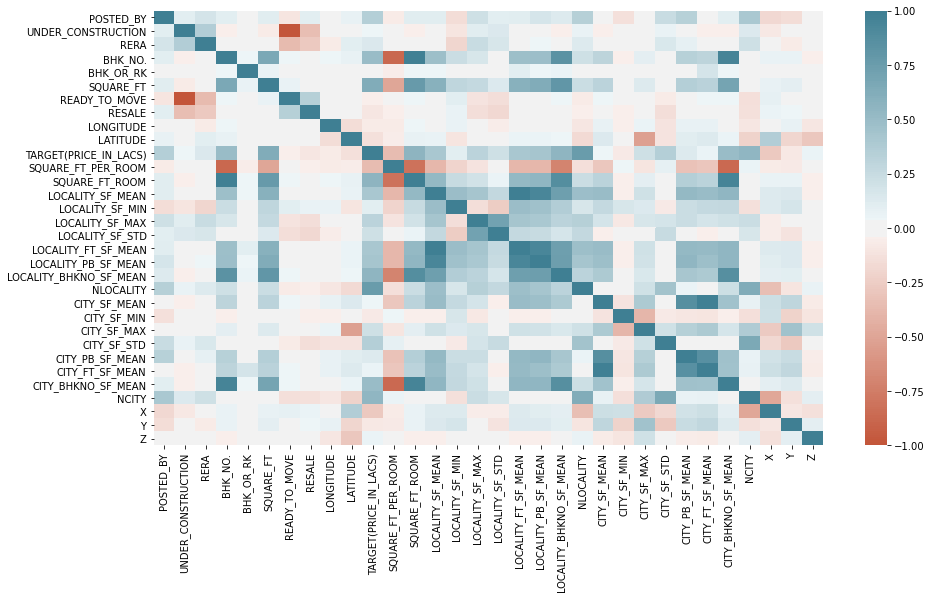

In [73]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),cmap=sns.diverging_palette(20, 220, n=200));

In [74]:
cat_cols=['UNDER_CONSTRUCTION','POSTED_BY','RERA','BHK_NO.','BHK_OR_RK','READY_TO_MOVE','RESALE']

In [75]:
y=train['TARGET(PRICE_IN_LACS)']
X=train.drop(['TARGET(PRICE_IN_LACS)'],axis=1)

Kfold LGBM

In [77]:
%%time 
from sklearn.model_selection import KFold
err = [] 
y_pred_tot_lgbm = np.zeros((len(test), ))


fold = KFold(n_splits=10, shuffle=True, random_state=2020)
i = 1

for train_index, test_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    m = LGBMRegressor(n_estimators=5000,importance_type='gain')
    m.fit(x_train, y_train,eval_set=[(x_val, y_val)],early_stopping_rounds=50, categorical_feature=cat_cols,verbose=0)
    pred_val = m.predict(x_val)
    print(i, " err_lgm: ", np.sqrt(mean_squared_log_error(np.exp(y_val)-1,np.exp(pred_val)-1)))
    err.append(np.sqrt(mean_squared_log_error(np.exp(y_val)-1,np.exp(pred_val)-1)))
    y_pred_tot_lgbm+= m.predict(test)
    i = i + 1
y_pred_tot_lgbm=y_pred_tot_lgbm/10
sum(err)/10


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['BHK_NO.', 'BHK_OR_RK', 'POSTED_BY', 'READY_TO_MOVE', 'RERA', 'RESALE', 'UNDER_CONSTRUCTION']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


1  err_lgm:  0.2700085867945723


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['BHK_NO.', 'BHK_OR_RK', 'POSTED_BY', 'READY_TO_MOVE', 'RERA', 'RESALE', 'UNDER_CONSTRUCTION']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


2  err_lgm:  0.29499302782312364


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['BHK_NO.', 'BHK_OR_RK', 'POSTED_BY', 'READY_TO_MOVE', 'RERA', 'RESALE', 'UNDER_CONSTRUCTION']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


3  err_lgm:  0.2748198662360566


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['BHK_NO.', 'BHK_OR_RK', 'POSTED_BY', 'READY_TO_MOVE', 'RERA', 'RESALE', 'UNDER_CONSTRUCTION']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


4  err_lgm:  0.286286485689435


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['BHK_NO.', 'BHK_OR_RK', 'POSTED_BY', 'READY_TO_MOVE', 'RERA', 'RESALE', 'UNDER_CONSTRUCTION']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


5  err_lgm:  0.2674966857761276


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['BHK_NO.', 'BHK_OR_RK', 'POSTED_BY', 'READY_TO_MOVE', 'RERA', 'RESALE', 'UNDER_CONSTRUCTION']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


6  err_lgm:  0.2996768019915952


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['BHK_NO.', 'BHK_OR_RK', 'POSTED_BY', 'READY_TO_MOVE', 'RERA', 'RESALE', 'UNDER_CONSTRUCTION']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


7  err_lgm:  0.27907175357869207


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['BHK_NO.', 'BHK_OR_RK', 'POSTED_BY', 'READY_TO_MOVE', 'RERA', 'RESALE', 'UNDER_CONSTRUCTION']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


8  err_lgm:  0.25030142962007706


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['BHK_NO.', 'BHK_OR_RK', 'POSTED_BY', 'READY_TO_MOVE', 'RERA', 'RESALE', 'UNDER_CONSTRUCTION']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


9  err_lgm:  0.2699603322870716


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['BHK_NO.', 'BHK_OR_RK', 'POSTED_BY', 'READY_TO_MOVE', 'RERA', 'RESALE', 'UNDER_CONSTRUCTION']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


10  err_lgm:  0.2714572438733645
CPU times: user 2min 30s, sys: 1.05 s, total: 2min 31s
Wall time: 39.4 s


0.27640722136701157

In [78]:
# writing prediction of lgbm to a csv file
# sub['TARGET(PRICE_IN_LACS)']=np.exp(y_pred_tot_lgbm)-1
# sub.to_csv('lgbm_kfold.csv',index=False)

Kfold XgBoost

In [79]:
err = [] 
y_pred_tot_xgb = np.zeros((len(test), ))


fold = KFold(n_splits=10, shuffle=True, random_state=2020)
i = 1

for train_index, test_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    m = XGBRegressor(n_estimators=1001)
    m.fit(x_train, y_train,eval_set=[(x_val, y_val)],early_stopping_rounds=50,verbose=0)
    pred_val = m.predict(x_val)
    print(i, " err_xgb: ", np.sqrt(mean_squared_log_error(np.exp(y_val)-1,np.exp(pred_val)-1)))
    err.append(np.sqrt(mean_squared_log_error(np.exp(y_val)-1,np.exp(pred_val)-1)))
    y_pred_tot_xgb+= m.predict(test)
    i = i + 1
y_pred_tot_xgb=y_pred_tot_xgb/10
sum(err)/10

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1001, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

1  err_xgb:  0.2652555963380819


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1001, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

2  err_xgb:  0.2957315211729568


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1001, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

3  err_xgb:  0.2694949105820445


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1001, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

4  err_xgb:  0.2912778694759418


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1001, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

5  err_xgb:  0.274663725575146


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1001, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

6  err_xgb:  0.3072236245374282


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1001, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

7  err_xgb:  0.29145716034095387


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1001, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

8  err_xgb:  0.2569950050799101


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1001, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

9  err_xgb:  0.276474953936679


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1001, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

10  err_xgb:  0.272172898809599


0.2800747265848741

In [80]:
# writing prediction of xgboost to a csv file
# sub['TARGET(PRICE_IN_LACS)']=np.exp(y_pred_tot_xgb)-1
# sub.to_csv('xgb_kfold.csv',index=False)

kfold catboost

In [81]:
err = [] 
y_pred_tot_catb = np.zeros((len(test), ))


fold = KFold(n_splits=10, shuffle=True, random_state=2020)
i = 1

for train_index, test_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    m = CatBoostRegressor(n_estimators=5000)
    m.fit(x_train, y_train,eval_set=[(x_val, y_val)],cat_features=cat_cols,early_stopping_rounds=50,verbose=0)
    pred_val = m.predict(x_val)
    print(i, " err_catb: ", np.sqrt(mean_squared_log_error(np.exp(y_val)-1,np.exp(pred_val)-1)))
    err.append(np.sqrt(mean_squared_log_error(np.exp(y_val)-1,np.exp(pred_val)-1)))
    y_pred_tot_catb+= m.predict(test)
    i = i + 1
y_pred_tot_catb=y_pred_tot_catb/10
sum(err)/10

1  err_catb:  0.26110565652048007


2  err_catb:  0.29477836665769525


3  err_catb:  0.2740556567109096


4  err_catb:  0.2861999314849433


5  err_catb:  0.26677331562209683


6  err_catb:  0.2859328419069842


7  err_catb:  0.28143982458641165


8  err_catb:  0.24977836602593637


9  err_catb:  0.27165680112243323


10  err_catb:  0.2692244392115528


0.2740945199849444

In [82]:
# writing prediction of catboost to a csv file
# sub['TARGET(PRICE_IN_LACS)']=np.exp(y_pred_tot_catb)-1
# sub.to_csv('catb_kfold.csv',index=False)

In [83]:
# writing ensemble of above three predictions to a csv file
sub['TARGET(PRICE_IN_LACS)']=np.exp((y_pred_tot_xgb*0.62+y_pred_tot_lgbm*0.19+y_pred_tot_catb*0.19))-1
sub['TARGET(PRICE_IN_LACS)']=y_from_train.fillna(sub['TARGET(PRICE_IN_LACS)'])
sub.to_csv('avg3.csv',index=False)